In [1]:
import sys
sys.path.append('/Users/allisonmorgan/Code/src/github.com/samfway/')

In [2]:
import csv
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import os
import random
import matplotlib

from matplotlib_venn import venn2
from faculty_hiring.misc.plotting import *  # Definitions for LABEL_SIZE and such
from faculty_hiring.misc.util import *
from faculty_hiring.parse import faculty_parser, institution_parser
from faculty_hiring.parse import load

In [3]:
# Load the data set
faculty_2011 = []; names_2011 = [];
faculty_2017 = []; names_2017 = [];
retained = []; names_retained = [];
with open('../data/faculty.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=["", "title_2011", "place_2011", "title_2017", "place_2017", "sex", "guid"], delimiter = ",")
    for i, row in enumerate(reader):
        if i == 0: continue
        if len(row["title_2011"]) > 0:
            faculty_2011.append(row)
            names_2011.append(row["guid"])
        if len(row["title_2017"]) > 0:
            faculty_2017.append(row)
            names_2017.append(row["guid"])
        if len(row["title_2011"]) > 0 and len(row["title_2017"]) > 0:
            retained.append(row)
            names_retained.append(row["guid"])

In [4]:
print(len(faculty_2011), len(faculty_2017), len(retained))

(5017, 5237, 3461)


/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


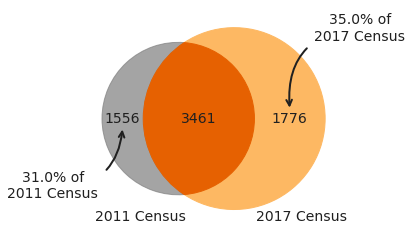

In [5]:
# Plot the venn diagram
outer_left_bound = len(faculty_2011); inner_left_bound = len(faculty_2011) - len(retained);
inner_right_bound = len(retained) + len(faculty_2017); #outer_right_bound = len(new)

fig, ax = plt.subplots(figsize=(6.0, 4.0))
v = venn2([set(range(0, outer_left_bound)), set(range(inner_left_bound, inner_right_bound))], set_labels=("",""))

font = {'family' : 'sans', 'sans-serif': 'Helvetica', 'size': LEGEND_SIZE}
matplotlib.rc('font', **font)

v.patches[0].set_color('gray')
v.patches[0].set_alpha(0.71)
v.patches[1].set_color('#fdb863')
v.patches[1].set_alpha(1.0)
v.patches[2].set_color('#e66101')
v.patches[2].set_alpha(1.0)

v.subset_labels[0].set_text('%0.0f' % (inner_left_bound))
v.subset_labels[0].set_fontsize(LABEL_SIZE) 
v.subset_labels[1].set_text('%0.0f' % (len(faculty_2017) - len(retained)))
v.subset_labels[1].set_fontsize(LABEL_SIZE) 
# v.subset_labels[2].set_text('\n\n%0.0f\n\n\n%0.1f%% of 2011\n%0.1f%% of 2017\nCensuses\n' % (3509, 3509*100./(len(old)), 3509*100./(len(new))))
v.subset_labels[2].set_fontsize(LABEL_SIZE) 

plt.annotate('%0.1f%% of\n2011 Census' % (inner_left_bound*100/(len(faculty_2011))), fontsize=LABEL_SIZE, xy=v.subset_labels[0].get_position() - np.array([0, 0.05]), xytext=(-70,-70), ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc=ALMOST_BLACK, alpha=0.0), arrowprops=dict(linewidth=2, arrowstyle='->', connectionstyle='arc3,rad=0.5',color=ALMOST_BLACK))
plt.annotate('%0.1f%% of\n2017 Census' % ((len(faculty_2017) - len(retained))*100/(len(faculty_2011))), fontsize=LABEL_SIZE, xy=v.subset_labels[1].get_position() - np.array([0, -0.05]), xytext=(70,70), ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc=ALMOST_BLACK, alpha=0.0), arrowprops=dict(linewidth=2, arrowstyle='->', connectionstyle='arc3,rad=0.5', color=ALMOST_BLACK))

plt.annotate('2017 Census', fontsize=LABEL_SIZE, xy=[0.25,-0.57])
plt.annotate('2011 Census', fontsize=LABEL_SIZE, xy=[-0.65,-0.57])

#plt.tight_layout()
finalize(ax)
plt.show()

## Adjust for error

In [6]:
new = [f for f in faculty_2017 if f['guid'] not in names_retained]
gone = [f for f in faculty_2011 if f['guid'] not in names_retained]

In [7]:
new_asst = len([f for f in new if f['title_2017'] == 'Assistant Professor'])
new_assoc = len([f for f in new if f['title_2017'] == 'Associate Professor'])
new_full = len([f for f in new if f['title_2017'] == 'Full Professor'])

In [8]:
asst_asst = 0; asst_assoc = 0; asst_full = 0;
assoc_asst = 0; assoc_assoc = 0; assoc_full = 0; 
full_asst = 0; full_assoc = 0; full_full = 0;
with open('../data/faculty.csv') as csvfile:
    reader = csv.DictReader(csvfile, ["", "title_2011", "place_2011", "title_2017", "place_2017", "sex", "guid"], delimiter = ",")
    for i, row in enumerate(reader):
        if i == 0: continue
        if row['title_2011'] == 'Assistant Professor':
            if row['title_2017'] == 'Assistant Professor': asst_asst += 1
            elif row['title_2017'] == 'Associate Professor': asst_assoc += 1
            elif row['title_2017'] == 'Full Professor': asst_full += 1
        elif row['title_2011'] == 'Associate Professor':
            if row['title_2017'] == 'Assistant Professor': assoc_asst += 1
            elif row['title_2017'] == 'Associate Professor': assoc_assoc += 1
            elif row['title_2017'] == 'Full Professor': assoc_full += 1
        elif row['title_2011'] == 'Full Professor':
            if row['title_2017'] == 'Assistant Professor': full_asst += 1
            elif row['title_2017'] == 'Associate Professor': full_assoc += 1
            elif row['title_2017'] == 'Full Professor': full_full += 1

In [9]:
asst_gone = len([f for f in gone if f['title_2011'] == 'Assistant Professor'])
assoc_gone = len([f for f in gone if f['title_2011'] == 'Associate Professor'])
full_gone = len([f for f in gone if f['title_2011'] == 'Full Professor'])

In [10]:
print((new_asst, new_assoc, new_full, 0), 
      (asst_asst, asst_assoc, asst_full, asst_gone), 
      (assoc_asst, assoc_assoc, assoc_full, assoc_gone),
      (full_asst, full_assoc, full_full, full_gone))

((1083, 272, 421, 0), (104, 438, 55, 260), (0, 703, 582, 481), (0, 0, 1579, 815))


In [11]:
x = {'New -> Asst': new_asst, 'New -> Assoc': new_assoc, 'New -> Full': new_full, 'New -> Gone': 0,
     'Asst -> Asst': asst_asst, 'Asst -> Assoc': asst_assoc, 'Asst -> Full': asst_full, 'Asst -> Gone': asst_gone,
     'Assoc -> Asst': assoc_asst, 'Assoc -> Assoc': assoc_assoc, 'Assoc -> Full': assoc_full, 'Assoc -> Gone': assoc_gone,
     'Full -> Asst': full_asst, 'Full -> Assoc': full_assoc, 'Full -> Full': full_full, 'Full -> Gone': full_gone}

In [12]:
x

{'Assoc -> Assoc': 703,
 'Assoc -> Asst': 0,
 'Assoc -> Full': 582,
 'Assoc -> Gone': 481,
 'Asst -> Assoc': 438,
 'Asst -> Asst': 104,
 'Asst -> Full': 55,
 'Asst -> Gone': 260,
 'Full -> Assoc': 0,
 'Full -> Asst': 0,
 'Full -> Full': 1579,
 'Full -> Gone': 815,
 'New -> Assoc': 272,
 'New -> Asst': 1083,
 'New -> Full': 421,
 'New -> Gone': 0}

In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
confusion = pd.read_csv('../data/confusion.csv', index_col=0, header=0).fillna(0.0)
confusion[['New -> Asst', 'New -> Assoc', 'New -> Full', 'New -> Gone',
    'Asst -> Asst', 'Asst -> Assoc', 'Asst -> Full', 'Asst -> Gone',
    'Assoc -> Asst', 'Assoc -> Assoc', 'Assoc -> Full', 'Assoc -> Gone',
    'Full -> Asst', 'Full -> Assoc', 'Full -> Full', 'Full -> Gone']]

,New -> Asst,New -> Assoc,New -> Full,New -> Gone,Asst -> Asst,Asst -> Assoc,Asst -> Full,Asst -> Gone,Assoc -> Asst,Assoc -> Assoc,Assoc -> Full,Assoc -> Gone,Full -> Asst,Full -> Assoc,Full -> Full,Full -> Gone
New -> Asst,0.944,0.000,0.000,0.045,0.011,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
New -> Assoc,0.059,0.529,0.000,0.176,0.000,0.000,0.000,0.000,0.000,0.235,0.000,0.000,0.000,0.000,0.000,0.000
New -> Full,0.000,0.038,0.462,0.269,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.231,0.000
New -> Gone,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Asst -> Asst,0.000,0.000,0.000,0.000,0.500,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Asst -> Assoc,0.000,0.000,0.000,0.000,0.000,0.914,0.086,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Asst -> Full,0.000,0.000,0.000,0.000,0.167,0.500,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Asst -> Gone,0.000,0.000,0.000,0.000,0.167,0.333,0.083,0.417,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Assoc -> Asst,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.333,0.333,0.000,0.333,0.000,0.000,0.000,0.000
Assoc -> Assoc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000


In [14]:
confusion_copy = confusion.copy()
confusion_copy = confusion_copy.mul([x[each] for each in confusion_copy.index], axis='index')

In [15]:
venn = confusion_copy[['New -> Asst', 'New -> Assoc', 'New -> Full', 'New -> Gone',
    'Asst -> Asst', 'Asst -> Assoc', 'Asst -> Full', 'Asst -> Gone',
    'Assoc -> Asst', 'Assoc -> Assoc', 'Assoc -> Full', 'Assoc -> Gone',
    'Full -> Asst', 'Full -> Assoc', 'Full -> Full', 'Full -> Gone']].sum(axis=0)
venn

New -> Asst      1038.157
New -> Assoc      160.192
New -> Full       194.308
New -> Gone       210.020
Asst -> Asst      116.669
Asst -> Assoc     566.624
Asst -> Full       77.543
Asst -> Gone      108.333
Assoc -> Asst       0.000
Assoc -> Assoc    991.759
Assoc -> Full     635.152
Assoc -> Gone     203.089
Full -> Asst        0.000
Full -> Assoc       0.000
Full -> Full     2220.397
Full -> Gone      270.757
dtype: float64

In [16]:
new = (venn['New -> Asst'] + venn['New -> Assoc'] + venn['New -> Full'])

In [17]:
retained = (venn['Asst -> Asst'] + venn['Asst -> Assoc'] + venn['Asst -> Full'] 
+ venn['Assoc -> Asst'] + venn['Assoc -> Assoc'] + venn['Assoc -> Full']
+ venn['Full -> Asst'] + venn['Full -> Assoc'] + venn['Full -> Full'])

In [18]:
old = (venn['Asst -> Gone'] + venn['Assoc -> Gone'] + venn['Full -> Gone'])

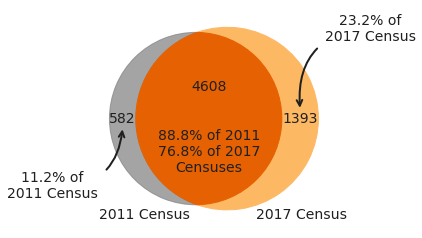

In [19]:
# Plot the venn diagram
fig, ax = plt.subplots(figsize=(6.0, 4.0)) # adding some space below just to the numbers fit in the bubbles
v = venn2([set(range(0, int(retained))), set(range(int(old+250), int(retained + new)))], set_labels=("","")) #set_labels = ('2011 Census', '2017 Census'))
#plt.title("Overlap of Faculty")
font = {'family' : 'sans',
        'sans-serif': 'Helvetica',
        'size'   : LEGEND_SIZE}
matplotlib.rc('font', **font)

v.patches[0].set_color('gray')
v.patches[0].set_alpha(0.71)
v.patches[1].set_color('#fdb863')
v.patches[1].set_alpha(1.0)
v.patches[2].set_color('#e66101')
v.patches[2].set_alpha(1.0)

v.subset_labels[0].set_text('%0.0f' % (old))
v.subset_labels[0].set_fontsize(LABEL_SIZE) 
v.subset_labels[1].set_text('%0.0f' % (new))
v.subset_labels[1].set_fontsize(LABEL_SIZE) 
v.subset_labels[2].set_text('\n\n%0.0f\n\n\n%0.1f%% of 2011\n%0.1f%% of 2017\nCensuses\n' % (retained, retained*100./(retained+old), retained*100./(retained+new)))
v.subset_labels[2].set_fontsize(LABEL_SIZE) 

plt.annotate('%0.1f%% of\n2011 Census' % (old*100./((retained+old))), fontsize=LABEL_SIZE, xy=v.subset_labels[0].get_position() - np.array([0, 0.05]), xytext=(-70,-70), ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc=ALMOST_BLACK, alpha=0.0), arrowprops=dict(linewidth=2, arrowstyle='->', connectionstyle='arc3,rad=0.5',color=ALMOST_BLACK))
plt.annotate('%0.1f%% of\n2017 Census' % (new*100./((retained+new))), fontsize=LABEL_SIZE, xy=v.subset_labels[1].get_position() - np.array([0, -0.05]), xytext=(70,70), ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc=ALMOST_BLACK, alpha=0.0), arrowprops=dict(linewidth=2, arrowstyle='->', connectionstyle='arc3,rad=0.5', color=ALMOST_BLACK))

plt.annotate('2017 Census', fontsize=LABEL_SIZE, xy=[0.25,-0.57])
plt.annotate('2011 Census', fontsize=LABEL_SIZE, xy=[-0.65,-0.57])

#plt.tight_layout()
finalize(ax)
plt.savefig("corrected_venn_diagram.tif", format='tif', dpi=1200)
plt.show()

# ... corrected counts for faculty in the the three groups: 1277 new hires, 3610 retained, and 1199 departed. 

In [20]:
abs((old + retained)-(new + retained))/float(old + retained) # Growth rate

0.15615186271946313

In [21]:
# Loop through the new and old faculty to get their name and title
from collections import Counter

new_counter = Counter(); old_counter = Counter();
for entry in faculty_2011:
    new_counter[entry["title_2011"]] += 1
for entry in faculty_2017:
    old_counter[entry["title_2017"]] += 1
    
print(old_counter, sum(old_counter.values()))
print(new_counter, sum(new_counter.values()))

(Counter({'Full Professor': 2637, 'Associate Professor': 1413, 'Assistant Professor': 1187}), 5237)
(Counter({'Full Professor': 2394, 'Associate Professor': 1766, 'Assistant Professor': 857}), 5017)


## Differential rates for men and women

In [22]:
def transitions(sex):
    x = {'Asst -> Asst': 0, 'Asst -> Assoc': 0, 'Asst -> Full': 0, 'Asst -> Gone': 0,
       'Assoc -> Asst': 0, 'Assoc -> Assoc': 0, 'Assoc -> Full': 0, 'Assoc -> Gone': 0, 
       'Full -> Asst': 0, 'Full -> Assoc': 0, 'Full -> Full': 0, 'Full -> Gone': 0}
    
    with open('../data/faculty.csv') as csvfile:
        reader = csv.DictReader(csvfile, fieldnames=["", "title_2011", "place_2011", "title_2017", "place_2017", "sex", "guid"], delimiter = ",")
        for i, row in enumerate(reader):
            if i == 0: continue
            if row["sex"] != sex: continue

            if row["title_2011"] == "Assistant Professor":
                if row["title_2017"] == "Assistant Professor": x['Asst -> Asst'] += 1
                elif row["title_2017"] == "Associate Professor": x['Asst -> Assoc'] += 1
                elif row["title_2017"] == "Full Professor": x['Asst -> Full'] += 1
                else: x['Asst -> Gone'] += 1
            elif row["title_2011"] == "Associate Professor":
                if row["title_2017"] == "Assistant Professor": x['Assoc -> Asst'] += 1
                elif row["title_2017"] == "Associate Professor": x['Assoc -> Assoc'] += 1
                elif row["title_2017"] == "Full Professor": x['Assoc -> Full'] += 1
                else: x['Assoc -> Gone'] += 1
            elif row["title_2011"] == "Full Professor":
                if row["title_2017"] == "Assistant Professor": x['Full -> Asst'] += 1
                elif row["title_2017"] == "Associate Professor": x['Full -> Assoc'] += 1
                elif row["title_2017"] == "Full Professor": x['Full -> Full'] += 1
                else: x['Full -> Gone'] += 1
    
    return x

In [23]:
x_m = transitions("M")
x_m

{'Assoc -> Assoc': 598,
 'Assoc -> Asst': 0,
 'Assoc -> Full': 474,
 'Assoc -> Gone': 419,
 'Asst -> Assoc': 325,
 'Asst -> Asst': 81,
 'Asst -> Full': 49,
 'Asst -> Gone': 207,
 'Full -> Assoc': 0,
 'Full -> Asst': 0,
 'Full -> Full': 1391,
 'Full -> Gone': 725}

In [24]:
confusion_copy = confusion.copy()
confusion_copy.drop(['New -> Asst', 'New -> Assoc', 'New -> Full', 'New -> Gone'], axis=1, inplace=True)
confusion_copy.drop(['New -> Asst', 'New -> Assoc', 'New -> Full', 'New -> Gone'], axis=0, inplace=True)
confusion_copy = confusion_copy.mul([x_m[each] for each in confusion_copy.columns], axis='index')
# confusion_copy[['Asst -> Asst', 'Asst -> Assoc', 'Asst -> Full', 'Asst -> Gone',
#          'Assoc -> Asst', 'Assoc -> Assoc', 'Assoc -> Full', 'Assoc -> Gone',
#          'Full -> Asst', 'Full -> Assoc', 'Full -> Full', 'Full -> Gone']]

In [25]:
m_counts= confusion_copy[['Asst -> Asst', 'Asst -> Assoc', 'Asst -> Full', 'Asst -> Gone',
    'Assoc -> Asst', 'Assoc -> Assoc', 'Assoc -> Full', 'Assoc -> Gone',
    'Full -> Asst', 'Full -> Assoc', 'Full -> Full', 'Full -> Gone']].sum(axis=0)
m_counts

Asst -> Asst      447.833
Asst -> Assoc     675.667
Asst -> Full      192.917
Asst -> Gone      174.583
Assoc -> Asst     108.333
Assoc -> Assoc    282.258
Assoc -> Full      75.675
Assoc -> Gone     195.733
Full -> Asst        0.000
Full -> Assoc       0.000
Full -> Full     1875.315
Full -> Gone      240.685
dtype: float64

In [26]:
m_counts['Full -> Gone']/(m_counts['Full -> Asst']+m_counts['Full -> Assoc']+m_counts['Full -> Full']+m_counts['Full -> Gone'])

0.1137450463201282

In [27]:
(m_counts['Asst -> Gone'] + m_counts['Assoc -> Gone'] + m_counts['Full -> Gone'])/(np.sum(m_counts))

0.1431251311033252

In [28]:
x_f = transitions("F")
x_f

{'Assoc -> Assoc': 104,
 'Assoc -> Asst': 0,
 'Assoc -> Full': 108,
 'Assoc -> Gone': 62,
 'Asst -> Assoc': 111,
 'Asst -> Asst': 23,
 'Asst -> Full': 6,
 'Asst -> Gone': 53,
 'Full -> Assoc': 0,
 'Full -> Asst': 0,
 'Full -> Full': 185,
 'Full -> Gone': 89}

In [29]:
confusion_copy = confusion.copy()
confusion_copy.drop(['New -> Asst', 'New -> Assoc', 'New -> Full', 'New -> Gone'], axis=1, inplace=True)
confusion_copy.drop(['New -> Asst', 'New -> Assoc', 'New -> Full', 'New -> Gone'], axis=0, inplace=True)
confusion_copy = confusion_copy.mul([x_f[each] for each in confusion_copy.columns], axis='index')
# confusion_copy[['Asst -> Asst', 'Asst -> Assoc', 'Asst -> Full', 'Asst -> Gone',
#          'Assoc -> Asst', 'Assoc -> Assoc', 'Assoc -> Full', 'Assoc -> Gone',
#          'Full -> Asst', 'Full -> Assoc', 'Full -> Full', 'Full -> Gone']]

In [30]:
f_counts = confusion_copy[['Asst -> Asst', 'Asst -> Assoc', 'Asst -> Full', 'Asst -> Gone',
    'Assoc -> Asst', 'Assoc -> Assoc', 'Assoc -> Full', 'Assoc -> Gone',
    'Full -> Asst', 'Full -> Assoc', 'Full -> Full', 'Full -> Gone']].sum(axis=0)
f_counts

Asst -> Asst      80.333
Asst -> Assoc    126.667
Asst -> Full      41.167
Asst -> Gone      25.833
Assoc -> Asst     37.000
Assoc -> Assoc    83.669
Assoc -> Full     12.953
Assoc -> Gone     59.378
Full -> Asst       0.000
Full -> Assoc      0.000
Full -> Full     244.274
Full -> Gone      29.726
dtype: float64

In [31]:
f_counts['Full -> Gone']/(f_counts['Full -> Asst']+f_counts['Full -> Assoc']+f_counts['Full -> Full']+f_counts['Full -> Gone'])

0.10849046546162223

In [32]:
(f_counts['Asst -> Gone'] + f_counts['Assoc -> Gone'] + f_counts['Full -> Gone'])/(np.sum(f_counts))

0.15511133420727247

In [33]:
# Build sets of names for assistant, associate, and full professors
old_asst_faculty = set([entry["guid"] for entry in faculty_2011 if entry["title_2011"] == 'Assistant Professor'])
new_asst_faculty = set([entry["guid"] for entry in faculty_2017 if entry["title_2017"] == 'Assistant Professor'])
old_assoc_faculty = set([entry["guid"] for entry in faculty_2011 if entry["title_2011"] == 'Associate Professor'])
new_assoc_faculty = set([entry["guid"] for entry in faculty_2017 if entry["title_2017"] == 'Associate Professor'])
old_full_faculty = set([entry["guid"] for entry in faculty_2011 if entry["title_2011"] == 'Full Professor'])
new_full_faculty = set([entry["guid"] for entry in faculty_2017 if entry["title_2017"] == 'Full Professor'])

full_old_sample = old_asst_faculty | old_assoc_faculty | old_full_faculty
full_new_sample = new_asst_faculty | new_assoc_faculty | new_full_faculty

In [34]:
# Index (i, j) refers to (professor rank in 2011, professor rank in 2017)
def build_matrix(old, new):
    x = np.matrix([[0.,0.,0.], [0.,0.,0.], [0.,0.,0.]])
    row_sums = np.array([0, 0, 0]); row_sum = 0.0
    for i, old_rank in enumerate(old):
        for j, new_rank in enumerate(new):
            x[i, j] = float(len(old_rank.intersection(new_rank)))
            row_sum += float(len(old_rank.intersection(new_rank)))
        
        for j, new_rank in enumerate(new):
            x[i, j] = float(x[i, j])/float(row_sum)
        row_sums[i] = row_sum
        row_sum = 0.0
    
    return (x, row_sums)
            
print("State matrix:\n{0}".format(build_matrix([old_asst_faculty, old_assoc_faculty, old_full_faculty], 
                   [new_asst_faculty, new_assoc_faculty, new_full_faculty])))

State matrix:
(matrix([[ 0.17420436,  0.73366834,  0.0921273 ],
        [ 0.        ,  0.54708171,  0.45291829],
        [ 0.        ,  0.        ,  1.        ]]), array([ 597, 1285, 1579]))


In [35]:
old_asst_faculty_m = set([entry["guid"] for entry in faculty_2011 if entry['title_2011'] == 'Assistant Professor' and entry['sex'] == 'M'])
old_assoc_faculty_m = set([entry["guid"] for entry in faculty_2011 if entry['title_2011'] == 'Associate Professor' and entry['sex'] == 'M'])
old_full_faculty_m = set([entry["guid"] for entry in faculty_2011 if entry['title_2011'] == 'Full Professor' and entry['sex'] == 'M'])

men = build_matrix([old_asst_faculty_m, old_assoc_faculty_m, old_full_faculty_m], 
                   [new_asst_faculty, new_assoc_faculty, new_full_faculty])
print("State matrix for men:\n{0}".format(men))

State matrix for men:
(matrix([[ 0.17802198,  0.71428571,  0.10769231],
        [ 0.        ,  0.55783582,  0.44216418],
        [ 0.        ,  0.        ,  1.        ]]), array([ 455, 1072, 1391]))


In [36]:
old_asst_faculty_f = set([entry["guid"] for entry in faculty_2011 if entry['title_2011'] == 'Assistant Professor' and entry['sex'] == 'F'])
old_assoc_faculty_f = set([entry["guid"] for entry in faculty_2011 if entry['title_2011'] == 'Associate Professor' and entry['sex'] == 'F'])
old_full_faculty_f = set([entry["guid"] for entry in faculty_2011 if entry['title_2011'] == 'Full Professor' and entry['sex'] == 'F'])

women = build_matrix([old_asst_faculty_f, old_assoc_faculty_f, old_full_faculty_f], 
                   [new_asst_faculty, new_assoc_faculty, new_full_faculty])
print("State matrix for women:\n{0}".format(women))

State matrix for women:
(matrix([[ 0.16428571,  0.79285714,  0.04285714],
        [ 0.        ,  0.49056604,  0.50943396],
        [ 0.        ,  0.        ,  1.        ]]), array([140, 212, 185]))


In [37]:
asst_f = np.array([f_counts['Asst -> Asst'], f_counts['Asst -> Assoc'], f_counts['Asst -> Full'], f_counts['Asst -> Gone']])
asst_m = np.array([m_counts['Asst -> Asst'], m_counts['Asst -> Assoc'], m_counts['Asst -> Full'], m_counts['Asst -> Gone']])

assoc_f = np.array([f_counts['Assoc -> Asst'], f_counts['Assoc -> Assoc'], f_counts['Assoc -> Full'], f_counts['Assoc -> Gone']])
assoc_m = np.array([m_counts['Assoc -> Asst'], m_counts['Assoc -> Assoc'], m_counts['Assoc -> Full'], m_counts['Assoc -> Gone']])

full_f = np.array([f_counts['Full -> Asst'], f_counts['Full -> Assoc'], f_counts['Full -> Full'], f_counts['Full -> Gone']])
full_m = np.array([m_counts['Full -> Asst'], m_counts['Full -> Assoc'], m_counts['Full -> Full'], m_counts['Full -> Gone']])

print "WOMEN"
print(asst_f/np.sum(asst_f), np.sum(asst_f))
print(assoc_f/np.sum(assoc_f), np.sum(assoc_f))
print(full_f/np.sum(full_f), np.sum(full_f))
print("")
print "MEN"
print(asst_m/np.sum(asst_m), np.sum(asst_m))
print(assoc_m/np.sum(assoc_m), np.sum(assoc_m))
print(full_m/np.sum(full_m), np.sum(full_m))

WOMEN
(array([ 0.29318735,  0.4622871 ,  0.15024331,  0.09428224]), 274.00000000001859)
(array([ 0.19170984,  0.43351691,  0.06711637,  0.30765688]), 192.9999999998378)
(array([ 0.        ,  0.        ,  0.89150953,  0.10849047]), 274.00000000001853)

MEN
(array([ 0.3003577 ,  0.45316342,  0.12938744,  0.11709144]), 1491.0000000001255)
(array([ 0.16364552,  0.42637139,  0.1143134 ,  0.29566969]), 661.99999999948261)
(array([ 0.        ,  0.        ,  0.88625495,  0.11374505]), 2116.0000000001392)


### Tests for significance

In [38]:
men_left = m_counts['Asst -> Gone'] + m_counts['Assoc -> Gone'] + m_counts['Full -> Gone']
women_left = f_counts['Asst -> Gone'] + f_counts['Assoc -> Gone'] + f_counts['Full -> Gone']

print sp.stats.chi2_contingency([
    np.array([men_left, (np.sum(m_counts) - men_left)]), 
    np.array([women_left, (np.sum(f_counts) - women_left)])
])

print sp.stats.binom_test(x = women_left, n = np.sum(f_counts), p = men_left/(np.sum(m_counts)))

(0.63858921847375349, 0.42422212372613677, 1, array([[  618.56930921,  3650.43069079],
       [  107.36937412,   633.63062588]]))
0.400860021093


#### Differences at the assistant level

In [39]:
print (m_counts['Asst -> Asst']/np.sum(asst_m), f_counts['Asst -> Asst']/np.sum(asst_f))
print sp.stats.chi2_contingency([
    np.array([m_counts['Asst -> Asst'], (np.sum(asst_m) - m_counts['Asst -> Asst'])]), 
    np.array([f_counts['Asst -> Asst'], (np.sum(asst_f) - f_counts['Asst -> Asst'])])
])
print sp.stats.binom_test(x = f_counts['Asst -> Asst'], n = np.sum(asst_f), p = m_counts['Asst -> Asst']/np.sum(asst_m))

(0.30035770176632681, 0.29318734793206042)
(0.027707624630930343, 0.86779804858261089, 1, array([[  446.17365439,  1044.82634561],
       [   81.99301228,   192.00698772]]))
0.792398983986


In [40]:
print (m_counts['Asst -> Assoc']/np.sum(asst_m), f_counts['Asst -> Assoc']/np.sum(asst_f))
print sp.stats.chi2_contingency([
    np.array([m_counts['Asst -> Assoc'], (np.sum(asst_m) - m_counts['Asst -> Assoc'])]), 
    np.array([f_counts['Asst -> Assoc'], (np.sum(asst_f) - f_counts['Asst -> Assoc'])])
])
print sp.stats.binom_test(x = f_counts['Asst -> Assoc'], n = np.sum(asst_f), p = m_counts['Asst -> Assoc']/np.sum(asst_m))

(0.45316342499427908, 0.46228710462276423)
(0.045268842477612474, 0.83151045295535952, 1, array([[ 677.77847025,  813.22152975],
       [ 124.55486308,  149.44513692]]))
0.855609542793


In [41]:
print (m_counts['Asst -> Full']/np.sum(asst_m), f_counts['Asst -> Full']/np.sum(asst_f))
print sp.stats.chi2_contingency([
    np.array([m_counts['Asst -> Full'], (np.sum(asst_m) - m_counts['Asst -> Full'])]), 
    np.array([f_counts['Asst -> Full'], (np.sum(asst_f) - f_counts['Asst -> Full'])])
])
print sp.stats.binom_test(x = f_counts['Asst -> Full'], n = np.sum(asst_f), p = m_counts['Asst -> Full']/np.sum(asst_m))

(0.12938743572533765, 0.15024330900228397)
(0.7032906016517273, 0.4016802085385982, 1, array([[  197.74405099,  1293.25594901],
       [   36.33928234,   237.66071766]]))
0.321664342092


In [42]:
print (m_counts['Asst -> Gone']/np.sum(asst_m), f_counts['Asst -> Gone']/np.sum(asst_f))
print sp.stats.chi2_contingency([
    np.array([m_counts['Asst -> Gone'], (np.sum(asst_m) - m_counts['Asst -> Gone'])]), 
    np.array([f_counts['Asst -> Gone'], (np.sum(asst_f) - f_counts['Asst -> Gone'])])
])
print sp.stats.binom_test(x = f_counts['Asst -> Gone'], n = np.sum(asst_f), p = m_counts['Asst -> Gone']/np.sum(asst_m))

(0.11709143751405653, 0.094282238442891408)
(0.98048273509091299, 0.3220796557034068, 1, array([[  169.30382436,  1321.69617564],
       [   31.1128423 ,   242.8871577 ]]))
0.221005961503


#### Differences at the associate level

In [43]:
print (m_counts['Assoc -> Asst']/np.sum(assoc_m), f_counts['Assoc -> Asst']/np.sum(assoc_f))
print sp.stats.chi2_contingency([
    np.array([m_counts['Assoc -> Asst'], (np.sum(assoc_m) - m_counts['Assoc -> Asst'])]), 
    np.array([f_counts['Assoc -> Asst'], (np.sum(assoc_f) - f_counts['Assoc -> Asst'])])
])
print sp.stats.binom_test(x = f_counts['Assoc -> Asst'], n = np.sum(assoc_f), p = m_counts['Assoc -> Asst']/np.sum(assoc_m))

(0.16364551863037713, 0.19170984455955487)
(0.64714450194367545, 0.42113544839910311, 1, array([[ 112.52709552,  549.47290448],
       [  32.80623782,  160.19376218]]))
0.379563345893


In [44]:
print (m_counts['Assoc -> Assoc']/np.sum(assoc_m), f_counts['Assoc -> Assoc']/np.sum(assoc_f))
print sp.stats.chi2_contingency([
    np.array([m_counts['Assoc -> Assoc'], (np.sum(assoc_m) - m_counts['Assoc -> Assoc'])]), 
    np.array([f_counts['Assoc -> Assoc'], (np.sum(assoc_f) - f_counts['Assoc -> Assoc'])])
])
print sp.stats.binom_test(x = f_counts['Assoc -> Assoc'], n = np.sum(assoc_f), p = m_counts['Assoc -> Assoc']/np.sum(assoc_m))

(0.42637139219824821, 0.43351690726805758)
(0.0088120861817305961, 0.92521027024212643, 1, array([[ 283.32564395,  378.67435605],
       [  82.60098079,  110.39901921]]))
0.884125465038


In [45]:
print (m_counts['Assoc -> Full']/np.sum(assoc_m), f_counts['Assoc -> Full']/np.sum(assoc_f))
print sp.stats.chi2_contingency([
    np.array([m_counts['Assoc -> Full'], (np.sum(assoc_m) - m_counts['Assoc -> Full'])]), 
    np.array([f_counts['Assoc -> Full'], (np.sum(assoc_f) - f_counts['Assoc -> Full'])])
])
print sp.stats.binom_test(x = f_counts['Assoc -> Full'], n = np.sum(assoc_f), p = m_counts['Assoc -> Full']/np.sum(assoc_m))

(0.11431340135667394, 0.067116368494776618)
(3.0926248157699674, 0.078647847957518224, 1, array([[  68.62263415,  593.37736585],
       [  20.00629666,  172.99370334]]))
0.022658455548


In [46]:
print (m_counts['Assoc -> Gone']/np.sum(assoc_m), f_counts['Assoc -> Gone']/np.sum(assoc_f))
print sp.stats.chi2_contingency([
    np.array([m_counts['Assoc -> Gone'], (np.sum(assoc_m) - m_counts['Assoc -> Gone'])]), 
    np.array([f_counts['Assoc -> Gone'], (np.sum(assoc_f) - f_counts['Assoc -> Gone'])])
])
print sp.stats.binom_test(x = f_counts['Assoc -> Gone'], n = np.sum(assoc_f), p = m_counts['Assoc -> Gone']/np.sum(assoc_m))

(0.29566968781470088, 0.30765687967761085)
(0.053300646755957436, 0.81741631953024585, 1, array([[ 197.52462638,  464.47537362],
       [  57.58648473,  135.41351527]]))
0.751805758075


#### Differences at the full level

In [47]:
print (m_counts['Full -> Asst']/np.sum(full_m), f_counts['Full -> Asst']/np.sum(full_f))
# print sp.stats.chi2_contingency([
#     np.array([m_counts['Full -> Asst'], (np.sum(full_m) - m_counts['Full -> Asst'])]), 
#     np.array([f_counts['Full -> Asst'], (np.sum(full_f) - f_counts['Full -> Asst'])])
# ])
print sp.stats.binom_test(x = f_counts['Full -> Asst'], n = np.sum(full_f), p = m_counts['Full -> Asst']/np.sum(full_m))

(0.0, 0.0)
1.0


In [48]:
print (m_counts['Full -> Assoc']/np.sum(full_m), f_counts['Full -> Assoc']/np.sum(full_f))
# print sp.stats.chi2_contingency([
#     np.array([m_counts['Full -> Assoc'], (np.sum(full_m) - m_counts['Full -> Assoc'])]), 
#     np.array([f_counts['Full -> Assoc'], (np.sum(full_f) - f_counts['Full -> Assoc'])])
# ])
print sp.stats.binom_test(x = f_counts['Full -> Assoc'], n = np.sum(full_f), p = m_counts['Full -> Assoc']/np.sum(full_m))

(0.0, 0.0)
1.0


In [49]:
print (m_counts['Full -> Full']/np.sum(full_m), f_counts['Full -> Full']/np.sum(full_f))
print sp.stats.chi2_contingency([
    np.array([m_counts['Full -> Full'], (np.sum(full_m) - m_counts['Full -> Full'])]), 
    np.array([f_counts['Full -> Full'], (np.sum(full_f) - f_counts['Full -> Full'])])
])
print sp.stats.binom_test(x = f_counts['Full -> Full'], n = np.sum(full_f), p = m_counts['Full -> Full']/np.sum(full_m))

(0.88625495367987184, 0.89150953453837767)
(0.024655482528621871, 0.87522857864164394, 1, array([[ 1876.59017735,   239.40982265],
       [  242.9989171 ,    31.0010829 ]]))
0.924159750911


In [50]:
print (m_counts['Full -> Gone']/np.sum(full_m), f_counts['Full -> Gone']/np.sum(full_f))
print sp.stats.chi2_contingency([
    np.array([m_counts['Full -> Gone'], (np.sum(full_m) - m_counts['Full -> Gone'])]), 
    np.array([f_counts['Full -> Gone'], (np.sum(full_f) - f_counts['Full -> Gone'])])
])
print sp.stats.binom_test(x = f_counts['Full -> Gone'], n = np.sum(full_f), p = m_counts['Full -> Gone']/np.sum(full_m))

(0.1137450463201282, 0.10849046546162223)
(0.024655482528623297, 0.87522857864164039, 1, array([[  239.40982265,  1876.59017735],
       [   31.0010829 ,   242.9989171 ]]))
0.775169788225
